# This code assesses the outputs of VESIcal compared to the VolatileCalc parameterization of the Dixon (1997) model.  
- Test 1 compares saturation pressures from VolatileCalc and a Excel Macro with those from VESIcal for a variety of natural compositions, and synthetic arrays. 
- Test 2 compares X$_{H_{2}O}$ in the fluid phase at volatile saturation to that outputted by the Dixon Macro, and VolatileCalc
- Test 3 compares isobars with those of VolatileCalc
- Test 4 compares degassing paths

In [1]:
import sys
sys.path.insert(0, '../../../../')

import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["legend.fontsize"]= 14


# Test 1 - Comparing saturation pressures from VESIcal to VolatileCalc and the Dixon macro

In [3]:
myfile = v.ExcelFile('S2_Testing_Dixon_1997_VolatileCalc.xlsx',  sheet_name=0, input_type='wtpercent', norm='none')
data = myfile.data
VolatileCalc_PSat=data['VolatileCalc_P'] # Saturation pressure from VolatileCalc
DixonMacro_PSat=data['DixonMacro_P'] # Saturation pressure from dixon
satPs_wtemps_Dixon= myfile.calculate_saturation_pressure(temperature="Temp", model='Dixon')

../../../../VESIcal.py:5921: RuntimeWarning: Saturation pressure not found.
  xx0 = model.calculate_saturation_pressure(sample=sample,**kwargs)
../../../../VESIcal.py:5915: RuntimeWarning: Saturation pressure not found.
  satP = self.models[0].calculate_saturation_pressure(sample=sample,**kwargs)


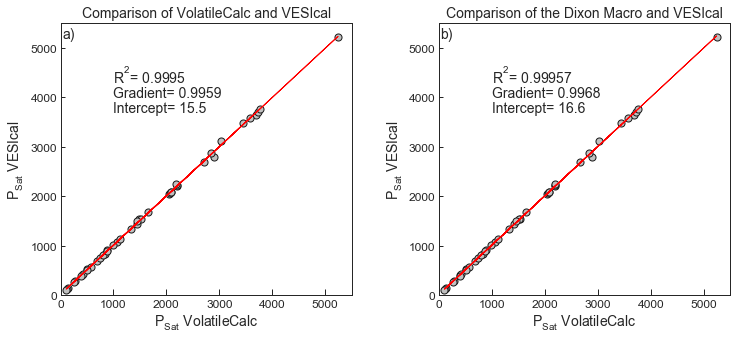

In [4]:
# Making linear regression
# VolatileCalc
X=VolatileCalc_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5)) # adjust dimensions of figure here

ax1.set_title('Comparison of VolatileCalc and VESIcal',   fontsize=14)
ax1.set_xlabel('P$_{Sat}$ VolatileCalc',   fontsize=14)
ax1.set_ylabel('P$_{Sat}$ VESIcal',   fontsize=14)
ax1.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax1.scatter(X_noNan, Y_noNan,  s=50, edgecolors='k', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 1))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 4))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 4)) 
#one='1:1 line'
ax1.text(1000, 3700, I, fontsize=14)
ax1.text(1000, 4000, G, fontsize=14)
ax1.text(1000, 4300, R, fontsize=14)


#Dixon Macro
X=DixonMacro_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures

ax2.set_title('Comparison of the Dixon Macro and VESIcal',  fontsize=14)
ax2.set_xlabel('P$_{Sat}$ VolatileCalc',    fontsize=14)
ax2.set_ylabel('P$_{Sat}$ VESIcal',   fontsize=14)
ax2.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax2.scatter(X_noNan, Y_noNan,  s=50, edgecolors='k', facecolors='silver', marker='o')


#plt.plot([0, 4000], [0, 4000])
I='Intercept= ' + str(np.round(lr.intercept_, 1))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 4))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
ax2.text(1000, 3700, I, fontsize=14)
ax2.text(1000, 4000, G, fontsize=14)
ax2.text(1000, 4300, R, fontsize=14)
ax1.set_ylim([0, 5500])
ax1.set_xlim([0, 5500])
ax2.set_ylim([0, 5500])
ax2.set_xlim([0, 5500])
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax1.text(30, 5200, 'a)', fontsize=14)
ax2.text(30, 5200, 'b)', fontsize=14)
fig.savefig('VolatileCalc_Test1.png', transparent=True)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


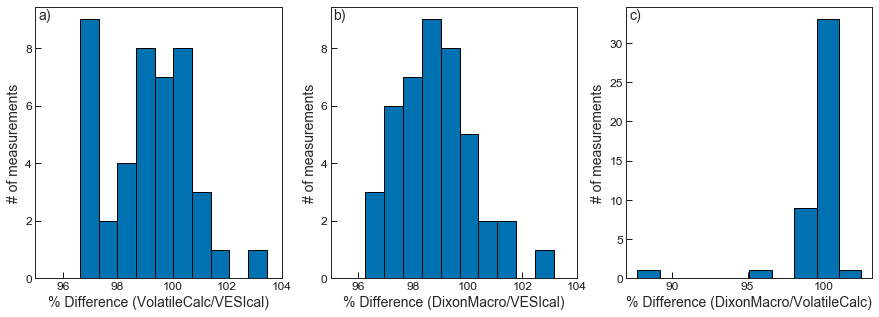

In [5]:
# This shows the % difference between VolatileCalc and VESIcal. The differences are similar in magnitude to those between VolatileCalc and the 
# Dixon Macro
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (15,5))
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

ax1.set_xlabel('% Difference (VolatileCalc/VESIcal)', fontsize=14)
ax1.set_ylabel('# of measurements', fontsize=14)
ax1.hist(100*VolatileCalc_PSat/satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])

ax2.set_xlabel('% Difference (DixonMacro/VESIcal)', fontsize=14)
ax2.set_ylabel('# of measurements', fontsize=14)
ax2.hist(100*DixonMacro_PSat/satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])

ax3.set_xlabel('% Difference (DixonMacro/VolatileCalc)', fontsize=14)
ax3.set_ylabel('# of measurements', fontsize=14)
ax3.hist(100*DixonMacro_PSat/VolatileCalc_PSat)
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.2, hspace=None)
ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax2.tick_params(axis="x", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)
ax3.tick_params(axis="y", labelsize=12)
ax3.tick_params(axis="x", labelsize=12)
ax1.set_xlim([95, 104])
ax2.set_xlim([95, 104])
#ax3.set_xlim([95, 104])
ax1.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
ax2.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
ax3.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
ax1.text(95.1, 9, 'a)', fontsize=14)
ax2.text(95.1, 9, 'b)', fontsize=14)
ax3.text(87.2, 33, 'c)', fontsize=14)
fig.savefig('VolatileCalc_Test2.png', transparent=True)


Text(1000, 2000, 'R$^2$= 0.99941')

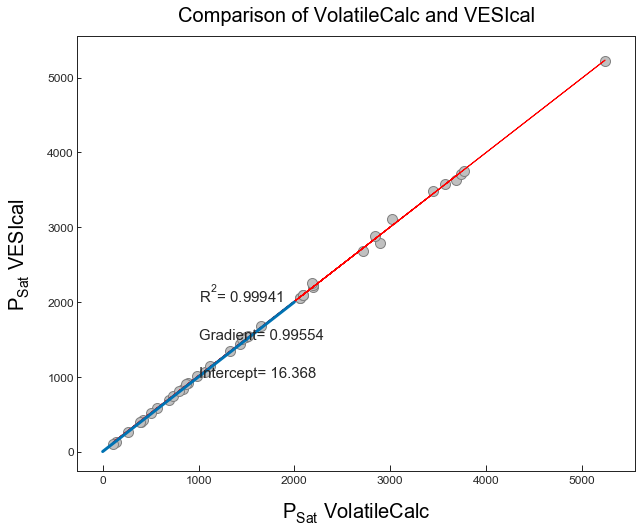

In [6]:
X=satPs_wtemps_Dixon['VolatileCalc_P']
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = (satPs_wtemps_Dixon['CO2']>0) 
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, ax1 = plt.subplots( figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of VolatileCalc and VESIcal',
        fontdict= font, pad = 15)
ax1.set_xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
ax1.set_ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
ax1.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax1.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
plt.plot([0, 2000], [0, 2000])
ax1.text(1000, 1000, I, fontsize=15)
ax1.text(1000, 1500, G, fontsize=15)
ax1.text(1000, 2000, R, fontsize=15)

# Test 2 - Comparing X$_{H_{2}O}$ in the fluid at the saturation pressure to that calculated using VolatileCalc and the Dixon Macro

In [7]:
eqfluid_Dixon_VolatileCalcP = myfile.calculate_equilibrium_fluid_comp(temperature="Temp", model='Dixon', pressure = None)
eqfluid_Dixon_DixonMacroP = myfile.calculate_equilibrium_fluid_comp(temperature="Temp", model='Dixon', pressure = None)

../../../../VESIcal.py:5921: RuntimeWarning: Saturation pressure not found.
  xx0 = model.calculate_saturation_pressure(sample=sample,**kwargs)
../../../../VESIcal.py:5915: RuntimeWarning: Saturation pressure not found.
  satP = self.models[0].calculate_saturation_pressure(sample=sample,**kwargs)
../../../../VESIcal.py:3904: RuntimeWarning: Saturation pressure not found.
  if self.calculate_saturation_pressure(sample=sample,**kwargs) < pressure:


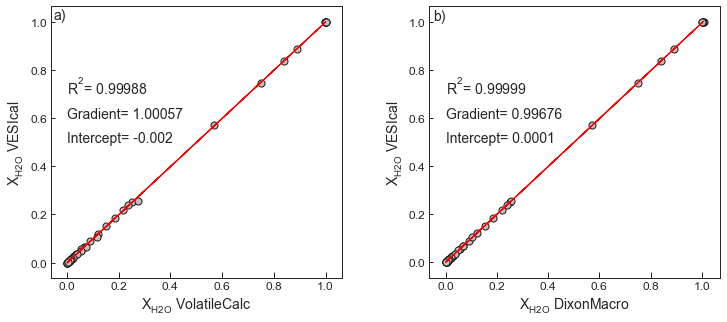

In [8]:
# Making linear regression
# VolatileCalc
X=0.01*eqfluid_Dixon_VolatileCalcP['VolatileCalc_H2Ov mol% (norm)'] # VolatileCalc outputs in %
Y=eqfluid_Dixon_VolatileCalcP['XH2O_fl_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5)) # adjust dimensions of figure here

ax1.set_xlabel('X$_{H2O}$ VolatileCalc', fontsize=14)
ax1.set_ylabel('X$_{H2O}$ VESIcal', fontsize=14)
ax1.scatter(X_noNan, Y_noNan,  s=50, edgecolors='k', facecolors='silver', marker='o')
ax1.plot(X_noNan,Y_pred, color='red', linewidth=1)

I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 

ax1.text(0, 0.5, I, fontsize=14)
ax1.text(0, 0.6, G, fontsize=14)
ax1.text(0, 0.7, R, fontsize=14)
# Dixon Macro
X=eqfluid_Dixon_DixonMacroP['DixonMacro_XH2O']
Y=eqfluid_Dixon_DixonMacroP['XH2O_fl_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
ax2.set_xlabel('X$_{H2O}$ DixonMacro', fontsize=14)
ax2.set_ylabel('X$_{H2O}$ VESIcal', fontsize=14)
               
ax2.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax2.scatter(X_noNan, Y_noNan,  s=50, edgecolors='k', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 5))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 

ax2.text(0, 0.5, I, fontsize=14)
ax2.text(0, 0.6, G, fontsize=14)
ax2.text(0, 0.7, R, fontsize=14)

plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax1.text(-0.05, 1.01, 'a)', fontsize=14)
ax2.text(-0.05, 1.01, 'b)', fontsize=14)
fig.savefig('VolatileCalc_Test3.png', transparent=True)

# Test 3 - Comparing Isobars to those calculated in VolatileCalc

In [9]:
#Loading Isobars from VolatileCalc 
Isobar_output= pd.read_excel('S2_Testing_Dixon_1997_VolatileCalc.xlsx', sheet_name='Isobar_Outputs', index_col=0)
myfile_Isobar_input= v.ExcelFile('S2_Testing_Dixon_1997_VolatileCalc.xlsx',   input_type='wtpercent', sheet_name='Isobar_Comp')
data_Isobar_input = myfile_Isobar_input.data


In [10]:
SampleName=0
bulk_comp= myfile_Isobar_input.get_sample_oxide_comp(SampleName)
temperature=1200

# Calculating isobars
isobars, isopleths = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Dixon',
                                            temperature=temperature,
                                            pressure_list=[500, 1000, 2000, 3000],
                                            isopleth_list=[0, 0.1, 0.2, 0.3, 0.5, 0.8, 0.9, 1],
                                            print_status=True).result

../../../../VESIcal.py:1720: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, as well as the upper calibration limit of 2000 bar suggested by Lesne et al. (2011), 
  w.warn(self.calib_check,RuntimeWarning)


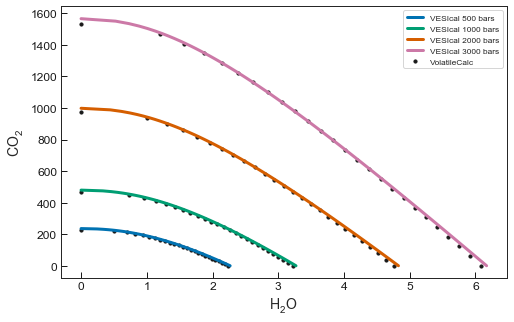

In [11]:
fig, ax1 = plt.subplots(figsize = (8,5))
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams.update({'font.size': 10})

plt.scatter(Isobar_output['Wt%H2O'], Isobar_output['PPMCO2'], marker='o', s=10,  label='VolatileCalc', color='k')
plt.plot(isobars.loc[isobars.Pressure==500, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==500, 'CO2_liq'], label='VESIcal 500 bars')
plt.plot(isobars.loc[isobars.Pressure==1000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==1000, 'CO2_liq'], label='VESIcal 1000 bars')
plt.plot(isobars.loc[isobars.Pressure==2000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==2000, 'CO2_liq'], label='VESIcal 2000 bars')
plt.plot(isobars.loc[isobars.Pressure==3000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==3000, 'CO2_liq'], label='VESIcal 3000 bars')
plt.legend(fontsize='small')
ax1.set_xlabel('H$_2$O', fontsize=14)
ax1.set_ylabel('CO$_2$', fontsize=14)
ax1.tick_params(axis="x", labelsize=12)
ax1.tick_params(axis="y", labelsize=12)
ax1.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
fig.savefig('VolatileCalc_Test3proper.png', transparent=True)

In [12]:
# Calcuating Degassing paths

In [13]:
# Open system degassing path from VolatileCalc
VolatileCalc_OpenSystem_1H_500C = pd.read_excel(r'S2_Testing_Dixon_1997_VolatileCalc.xlsx', sheet_name='OpenSystem_1wt%H_500ppm')
VolatileCalc_OpenSystem_1H_2000C = pd.read_excel(r'S2_Testing_Dixon_1997_VolatileCalc.xlsx', sheet_name='OpenSystem_1wt%H_2000ppm')
VolatileCalc_OpenSystem_2H_500C = pd.read_excel(r'S2_Testing_Dixon_1997_VolatileCalc.xlsx', sheet_name='OpenSystem_1wt%H_500ppm')

In [15]:
myfile_degass_input= v.ExcelFile('S2_Testing_Dixon_1997_VolatileCalc.xlsx',   input_type='wtpercent', sheet_name='Degassing_In')
data_degass_input = myfile_degass_input.data

SampleName_1H_500C=0
bulk_comp_1H_500C=myfile_degass_input.get_sample_oxide_comp(SampleName_1H_500C)
SampleName_1H_2000C=2
bulk_comp_1H_2000C=myfile_degass_input.get_sample_oxide_comp(SampleName_1H_2000C)

# Open system - fractionate vapor =1
#open_df_1H_500C = v.calculate_degassing_path(sample=bulk_comp_1H_500C, temperature=1200, model='Dixon', fractionate_vapor=1).result
#open_df_1H_2000C = v.calculate_degassing_path(sample=bulk_comp_1H_2000C, temperature=1200, model='Dixon', fractionate_vapor=1).result

test_satP = v.calculate_saturation_pressure(sample=bulk_comp_1H_500C, temperature=1200, model='Dixon').result
test_satP2 = v.calculate_saturation_pressure(sample=bulk_comp_1H_2000C, temperature=1200, model='Dixon').result

print(test_satP)
print(test_satP2)

1141.1248917704636
1455.1129399216368


../../../../VESIcal.py:1720: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, 
  w.warn(self.calib_check,RuntimeWarning)


In [15]:
myfile_degass_input= v.ExcelFile('S2_Testing_Dixon_1997_VolatileCalc.xlsx',   input_type='wtpercent', sheet_name='Degassing_In')

SampleName_2H_500C=2
bulk_comp_2H_500C=myfile_degass_input.get_sample_oxide_comp(SampleName_2H_500C)
bulk_comp_2H_500C

{'SiO2': 49.0,
 'TiO2': 1.13039100935431,
 'Al2O3': 15.868950708243196,
 'Fe2O3': 0.9299157089391744,
 'FeO': 7.530168461039674,
 'MgO': 10.0559705373844,
 'CaO': 12.156051008287118,
 'Na2O': 2.704243106993772,
 'K2O': 0.3130313564365781,
 'H2O': 2.0,
 'CO2': 0.05,
 'Cr2O3': 0.0,
 'MnO': 0.0,
 'NiO': 0.0,
 'CoO': 0.0,
 'P2O5': 0.0}

In [17]:
SampleName_2H_500C=2
bulk_comp_2H_500C=myfile_degass_input.get_sample_oxide_comp(SampleName_2H_500C)
#open_df_2H_500C = v.calculate_degassing_path(sample=bulk_comp_2H_500C, temperature=1200, model='Dixon', fractionate_vapor=1).result

test_satP3 = v.calculate_saturation_pressure(sample=bulk_comp_2H_500C, temperature=1200, model='Dixon').result
print(test_satP3)

1455.1129399216368


Text(0.5, 1.0, '2000 ppm CO2 1 wt% H2O')

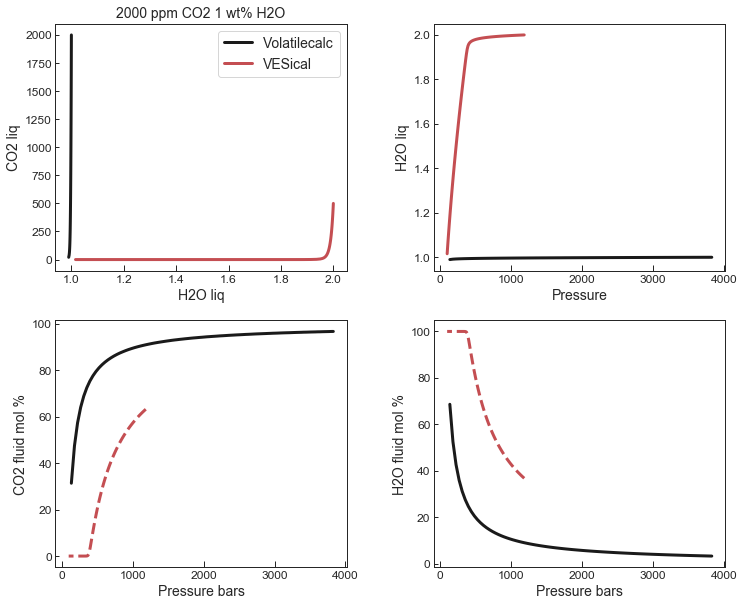

In [17]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplot(2, 2)
      
ax0.plot(VolatileCalc_OpenSystem_1H_2000C['Wt%H2O'], VolatileCalc_OpenSystem_1H_2000C['PPMCO2'], color='k', label='Volatilecalc')
ax0.plot(open_df_1H_2000C['H2O_liq'], 10000*open_df_1H_2000C['CO2_liq'], color='r', label='VESical')

ax0.set_xlabel('H2O liq')
ax0.set_ylabel('CO2 liq')


ax1.plot(VolatileCalc_OpenSystem_1H_2000C['P (bars)'], VolatileCalc_OpenSystem_1H_2000C['Wt%H2O'],  color='k')
ax1.plot(open_df_1H_2000C['Pressure_bars'], open_df_1H_2000C['H2O_liq'], color='r')
ax1.set_ylabel('H2O liq')
ax1.set_xlabel('Pressure')

ax2.plot( VolatileCalc_OpenSystem_1H_2000C['P (bars)'], VolatileCalc_OpenSystem_1H_2000C['CO2vmol%'], color='k')
ax2.plot(open_df_1H_2000C['Pressure_bars'], 100*open_df_1H_2000C['CO2_fl'], color='r', linestyle='dashed')
ax2.set_ylabel('CO2 fluid mol %')
ax2.set_xlabel('Pressure bars')

ax3.plot( VolatileCalc_OpenSystem_1H_2000C['P (bars)'], VolatileCalc_OpenSystem_1H_2000C['H2Ov mol%'], color='k')
ax3.plot( open_df_1H_2000C['Pressure_bars'], 100*open_df_1H_2000C['H2O_fl'], color='r', linestyle='dashed')
ax3.set_ylabel('H2O fluid mol %')
ax3.set_xlabel('Pressure bars')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax0.legend()
ax0.set_title('2000 ppm CO2 1 wt% H2O')

Text(0.5, 1.0, '500 ppm CO2 1 wt% H2O')

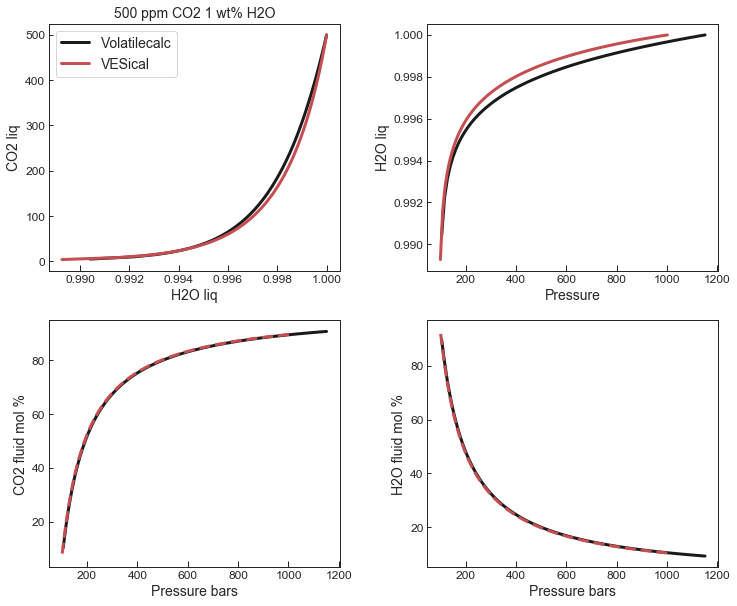

In [18]:
ax0.set_title('500 ppm CO2 1 wt% H2O')
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplot(2, 2)
      
ax0.plot(VolatileCalc_OpenSystem_1H_500C['Wt%H2O'], VolatileCalc_OpenSystem_1H_500C['PPMCO2'], color='k', label='Volatilecalc')
ax0.plot(open_df_1H_500C['H2O_liq'], 10000*open_df_1H_500C['CO2_liq'], color='r', label='VESical')

ax0.set_xlabel('H2O liq')
ax0.set_ylabel('CO2 liq')


ax1.plot(VolatileCalc_OpenSystem_1H_500C['P (bars)'], VolatileCalc_OpenSystem_1H_500C['Wt%H2O'],  color='k')
ax1.plot(open_df_1H_500C['Pressure_bars'], open_df_1H_500C['H2O_liq'], color='r')
ax1.set_ylabel('H2O liq')
ax1.set_xlabel('Pressure')

ax2.plot( VolatileCalc_OpenSystem_1H_500C['P (bars)'], VolatileCalc_OpenSystem_1H_500C['CO2vmol%'], color='k')
ax2.plot(open_df_1H_500C['Pressure_bars'], 100*open_df_1H_500C['CO2_fl'], color='r', linestyle='dashed')
ax2.set_ylabel('CO2 fluid mol %')
ax2.set_xlabel('Pressure bars')

ax3.plot( VolatileCalc_OpenSystem_1H_500C['P (bars)'], VolatileCalc_OpenSystem_1H_500C['H2Ov mol%'], color='k')
ax3.plot( open_df_1H_500C['Pressure_bars'], 100*open_df_1H_500C['H2O_fl'], color='r', linestyle='dashed')
ax3.set_ylabel('H2O fluid mol %')
ax3.set_xlabel('Pressure bars')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax0.legend()
ax0.set_title('500 ppm CO2 1 wt% H2O')

Text(0.5, 1.0, '500 ppm CO2 2 wt% H2O')

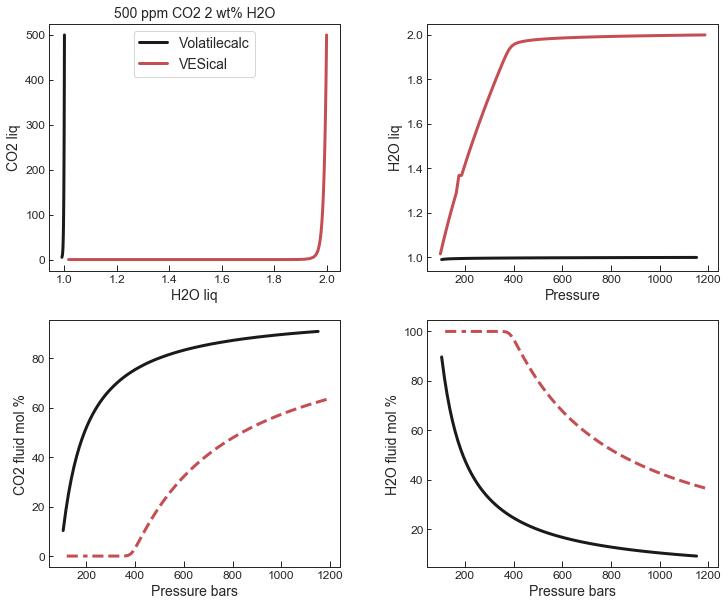

In [19]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplot(2, 2)
      
ax0.plot(VolatileCalc_OpenSystem_2H_500C['Wt%H2O'], VolatileCalc_OpenSystem_2H_500C['PPMCO2'], color='k', label='Volatilecalc')
ax0.plot(open_df_2H_500C['H2O_liq'], 10000*open_df_2H_500C['CO2_liq'], color='r', label='VESical')

ax0.set_xlabel('H2O liq')
ax0.set_ylabel('CO2 liq')


ax1.plot(VolatileCalc_OpenSystem_2H_500C['P (bars)'], VolatileCalc_OpenSystem_2H_500C['Wt%H2O'],  color='k')
ax1.plot(open_df_2H_500C['Pressure_bars'], open_df_2H_500C['H2O_liq'], color='r')
ax1.set_ylabel('H2O liq')
ax1.set_xlabel('Pressure')

ax2.plot( VolatileCalc_OpenSystem_2H_500C['P (bars)'], VolatileCalc_OpenSystem_2H_500C['CO2vmol%'], color='k')
ax2.plot(open_df_2H_500C['Pressure_bars'], 100*open_df_2H_500C['CO2_fl'], color='r', linestyle='dashed')
ax2.set_ylabel('CO2 fluid mol %')
ax2.set_xlabel('Pressure bars')

ax3.plot( VolatileCalc_OpenSystem_2H_500C['P (bars)'], VolatileCalc_OpenSystem_2H_500C['H2Ov mol%'], color='k')
ax3.plot( open_df_2H_500C['Pressure_bars'], 100*open_df_2H_500C['H2O_fl'], color='r', linestyle='dashed')
ax3.set_ylabel('H2O fluid mol %')
ax3.set_xlabel('Pressure bars')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
ax0.legend()
ax0.set_title('500 ppm CO2 2 wt% H2O')